In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qclab.models.ab_initio_h2 import AbInitioH2Model
from qclab.drivers.serial_driver import dynamics_serial
from qclab.recipes import AbInitioMeanFieldDynamicsRecipe


input_params = dict(temp = 1, num_atoms=2, init_disp=1, basis='6-31g', num_states=1, method='CISD')
model = AbInitioH2Model(input_params)

model.wf_adb = np.zeros(model.num_states)+0.0j
model.wf_adb[0] = 1.0+0.0j

recipe = AbInitioMeanFieldDynamicsRecipe()



recipe.params.num_trajs = 1
recipe.params.batch_size = 1
recipe.params.tmax = 3
recipe.params.dt_output = 0.01
recipe.params.dt = 0.01

data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)

input_params = dict(temp = 1, num_atoms=2, init_disp=1, basis='6-31g', num_states=10, method='CISD')
model = AbInitioH2Model(input_params)

model.wf_adb = np.zeros(model.num_states)+0.0j
model.wf_adb[0] = 1.0+0.0j

recipe = AbInitioMeanFieldDynamicsRecipe()



recipe.params.num_trajs = 1
recipe.params.batch_size = 1
recipe.params.tmax = 3
recipe.params.dt_output = 0.01
recipe.params.dt = 0.01
data_nad = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)



  0%|          | 0/1 [00:00<?, ?it/s]

0.0 1.0
0.0
0.0033222591362126247 1.000000000187406
0.0
0.006644518272425249 1.000000000375064
0.0
0.009966777408637873 1.000000000562967
0.0
0.013289036544850499 1.0000000007511072
0.0
0.016611295681063124 1.000000000939476
0.0
0.019933554817275746 1.0000000011280679
0.0
0.023255813953488372 1.0000000013168742
0.0
0.026578073089700997 1.0000000015058896
0.0
0.029900332225913623 1.0000000016951076
0.0
0.03322259136212625 1.0000000018845223
0.0
0.036544850498338874 1.0000000020741293
0.0
0.03986710963455149 1.0000000022639228
0.0
0.04318936877076412 1.0000000024538993
0.0
0.046511627906976744 1.0000000026440534
0.0
0.04983388704318937 1.0000000028343825
0.0
0.053156146179401995 1.000000003024883
0.0
0.05647840531561462 1.0000000032155536
0.0
0.059800664451827246 1.0000000034063907
0.0
0.06312292358803986 1.000000003597393
0.0
0.0664451827242525 1.0000000037885588
0.0
0.06976744186046512 1.0000000039798884
0.0
0.07308970099667775 1.0000000041713801
0.0
0.07641196013289037 1.0000000043630

100%|██████████| 1/1 [00:20<00:00, 20.03s/it]


0.9933554817275747 1.0000000467781298
0.0
0.9966777408637874 1.0000000468914156
0.0


  0%|          | 0/1 [00:00<?, ?it/s]

0.0 1.0
0.0
0.0033222591362126247 1.0000000001874112
0.0
0.006644518272425249 1.0000000008327488
0.0
0.009966777408637873 1.000000001460743
0.0
0.013289036544850499 1.0000000021299225
0.0
0.016611295681063124 1.00000000280796
0.0
0.019933554817275746 1.0000000033086758
0.0
0.023255813953488372 1.0000000038285823
0.0
0.026578073089700997 1.0000000042601225
0.0
0.029900332225913623 1.0000000047044282
0.0
0.03322259136212625 1.0000000048900832
0.0
0.036544850498338874 0.999999989533114
0.0
0.03986710963455149 0.999999989896848
0.0
0.04318936877076412 0.9999999907510325
0.0
0.046511627906976744 0.9999999916190287
0.0
0.04983388704318937 0.9999999925352099
0.0
0.053156146179401995 0.9999999927872533
0.0
0.05647840531561462 0.9999999934208436
0.0
0.059800664451827246 0.9999999940868581
0.0
0.06312292358803986 0.9999999946606376
0.0
0.0664451827242525 0.9999999953143298
0.0
0.06976744186046512 0.9999999959814814
0.0
0.07308970099667775 0.9999999969807053
0.0
0.07641196013289037 0.999999997252

100%|██████████| 1/1 [03:55<00:00, 235.79s/it]


/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


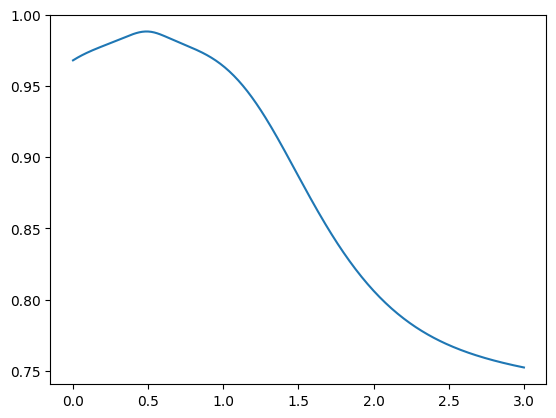

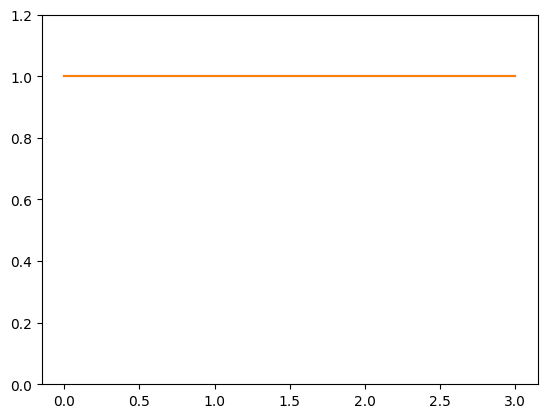

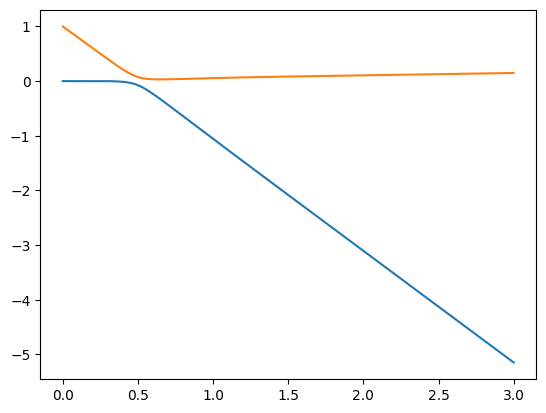

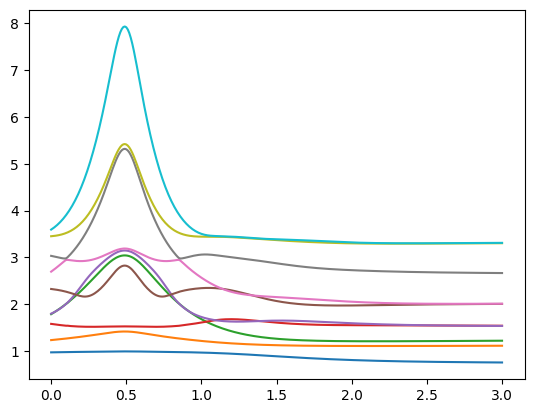

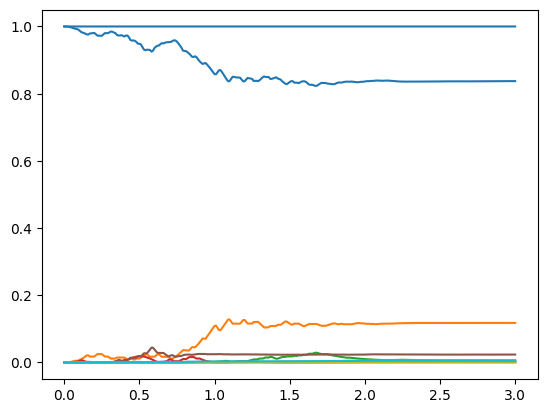

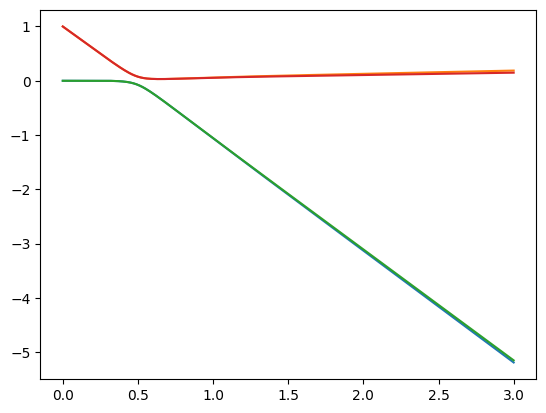

In [8]:

q_data = data.data_dic['q_coord']
wf_adb = data.data_dic['wf_adb']
t = data.data_dic['t']
diag_eq = data.data_dic['diag_eq']
plt.plot(t, diag_eq)
plt.show()
plt.plot(t,np.abs(np.sum(wf_adb,axis=(1,2)))**2)
plt.plot(t,np.sum(np.abs(wf_adb)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
q_data=q_data.reshape((len(q_data), model.num_atoms, 3))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()


q_data_nad = data_nad.data_dic['q_coord']
wf_adb_nad = data_nad.data_dic['wf_adb']
t_nad = data_nad.data_dic['t']
diag_eq_nad = data_nad.data_dic['diag_eq']
plt.plot(t_nad, diag_eq_nad)
plt.show()
plt.plot(t_nad,np.abs(np.sum(wf_adb_nad,axis=(1,2)))**2)
plt.plot(t_nad,np.sum(np.abs(wf_adb_nad)**2,axis=(1,2,3)))
#plt.ylim([0,1.2])
plt.show()
q_data_nad=q_data_nad.reshape((len(q_data_nad), model.num_atoms, 3))
plt.plot(t,np.real(q_data_nad[:,:,-1]))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()

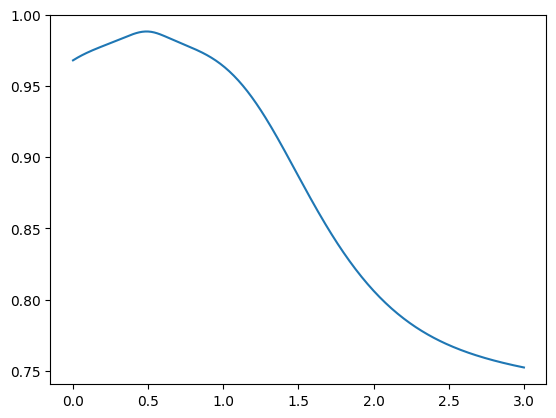

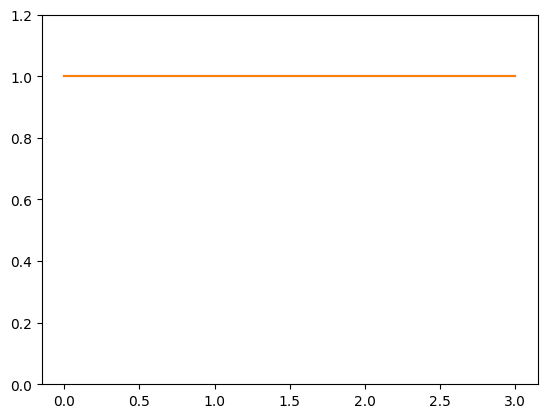

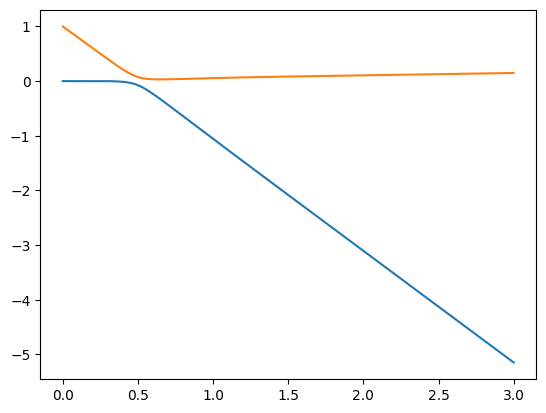

In [16]:

q_data = data.data_dic['q_coord']
wf_adb = data.data_dic['wf_adb']
t = data.data_dic['t']
diag_eq = data.data_dic['diag_eq']
plt.plot(t, diag_eq)
plt.show()
plt.plot(t,np.abs(np.sum(wf_adb,axis=(1,2)))**2)
plt.plot(t,np.sum(np.abs(wf_adb)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
q_data=q_data.reshape((len(q_data), model.num_atoms, 3))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()

In [8]:
import pyscf
from pyscf import gto, scf, cc, ao2mo

# Define the molecule
mol = gto.Mole()
mol.build(
    atom = 'H 0 0 0; F 0 0 1.1',  # in Angstrom
    basis = '6-31g',
    symmetry = True,
)

# Create two different mean-field objects (e.g., different geometries)
mf1 = scf.RHF(mol).run()
mf2 = scf.RHF(mol).run()
mf2.kernel(mf1.make_rdm1())  # Slightly perturb the second geometry

# Calculate the overlap matrix between the two sets of molecular orbitals
s12 = mf1.mo_coeff.T @ mol.intor('int1e_ovlp') @ mf2.mo_coeff

# Create CCSD solvers for both mean-field objects
ccsolver1 = cc.CCSD(mf1).run()
ccsolver2 = cc.CCSD(mf2).run()

# Extract the CCSD amplitudes
t1_1 = ccsolver1.t1
t2_1 = ccsolver1.t2
t1_2 = ccsolver2.t1
t2_2 = ccsolver2.t2

# Calculate the overlap between the two CCSD wavefunctions
rdm1_1 = ccsolver1.make_rdm1()
rdm1_2 = ccsolver2.make_rdm1()
print(s12)
overlap = np.trace(rdm1_1)# @ s12 @ rdm1_2 @ s12.T)

print('<CCSD1|CCSD2> = ', overlap)

converged SCF energy = -99.9593211672816
converged SCF energy = -99.9593211672815
converged SCF energy = -99.9593211672825
E(CCSD) = -100.1005986115778  E_corr = -0.141277444296198
E(CCSD) = -100.1005986121727  E_corr = -0.1412774448901866
[[ 1.00000000e+00  1.24549933e-09 -2.03253310e-09  0.00000000e+00
   0.00000000e+00 -1.72132047e-09 -1.49102593e-09  0.00000000e+00
   0.00000000e+00  2.78413573e-09 -2.05921988e-09]
 [-1.24549992e-09  1.00000000e+00 -5.16435827e-07  0.00000000e+00
   0.00000000e+00  1.37739349e-07  7.54198880e-08  0.00000000e+00
   0.00000000e+00  4.60579331e-08  1.16464107e-07]
 [ 2.03253415e-09  5.16435722e-07  1.00000000e+00  0.00000000e+00
   0.00000000e+00  6.58295421e-07  6.32231768e-08  0.00000000e+00
   0.00000000e+00 -1.62276972e-08  8.64951798e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.58633902e-07
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.0000000

In [9]:
import numpy
from pyscf import fci

numpy.random.seed(1)
norb = 7
nelec = (4,4)
h1 = numpy.random.random((norb,norb))
h2 = numpy.random.random((norb,norb,norb,norb))
# Restore permutation symmetry
h1 = h1 + h1.T
h2 = h2 + h2.transpose(1,0,2,3)
h2 = h2 + h2.transpose(0,1,3,2)
h2 = h2 + h2.transpose(2,3,0,1)

# pspace function computes the FCI Hamiltonian for "primary" determinants.
# Primary determinants are the determinants which have lowest expectation
# value <H>.  np controls the number of primary determinants.
# To get the entire Hamiltonian, np should be larger than the wave-function
# size.  In this example, a (8e,7o) FCI problem has 1225 determinants.
H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=1225)[1]
e_all, v_all = numpy.linalg.eigh(H_fci)

e, fcivec = fci.direct_spin1.kernel(h1, h2, norb, nelec, nroots=2,
                                    max_space=30, max_cycle=100)

print(np.shape(fcivec[0].ravel()))

(1225,)


In [10]:

import pyscf
myhf1 = pyscf.M(atom='H 0 0 0; F 0 0 1.1', basis='6-31g', verbose=0).RHF().run()
myci = pyscf.fci.FCI(myhf1)
myci.run(nroots = 3)
print(np.shape(myci.ci))

(3, 462, 462)


In [12]:
from functools import reduce
import numpy
import pyscf

myhf1 = pyscf.M(atom='H 0 0 0; F 0 0 1.1', basis='6-31g', verbose=0).RHF().run()
e1, ci1 = pyscf.fci.FCI(myhf1).kernel()
print('FCI energy of mol1', e1)

myhf2 = pyscf.M(atom='H 0 0 0; F 0 0 1.2', basis='6-31g', verbose=0).RHF().run()
e2, ci2 = pyscf.fci.FCI(myhf2).kernel()
print('FCI energy of mol2', e2)
print(np.shape(ci2))

myhf3 = pyscf.M(atom='H 0 0 0; F 0 0 1.3', basis='6-31g', verbose=0).UHF().run()
e3, ci3 = pyscf.fci.FCI(myhf3).kernel()
print('FCI energy of mol3', e3)

norb = myhf2.mo_energy.size
nelec = myhf2.mol.nelectron
eris = pyscf.ao2mo.full(myhf2.mol, myhf2.mo_coeff)
print(numpy.shape(eris))
h1 = myhf2.mo_coeff.T @ myhf2.get_hcore() @ myhf2.mo_coeff
H_fci = pyscf.fci.direct_spin1.pspace(h1, eris, norb, nelec, np=25)[1]
print(numpy.shape(H_fci))
#
# Overlap between FCI wfn of different geometries
#
s12 = pyscf.gto.intor_cross('int1e_ovlp', myhf1.mol, myhf2.mol)
s12 = reduce(numpy.dot, (myhf1.mo_coeff.T, s12, myhf2.mo_coeff))
norb = myhf2.mo_energy.size
nelec = myhf2.mol.nelectron
print('<FCI-mol1|FCI-mol2> = ', pyscf.fci.addons.overlap(ci1, ci2, norb, nelec, s12))

#
# Overlap between RHF-FCI and UHF-FCI
#
s13 = pyscf.gto.intor_cross('int1e_ovlp', myhf1.mol, myhf2.mol)
s13a = reduce(numpy.dot, (myhf1.mo_coeff.T, s13, myhf3.mo_coeff[0]))
s13b = reduce(numpy.dot, (myhf1.mo_coeff.T, s13, myhf3.mo_coeff[1]))
s13 = (s13a, s13b)
norb = myhf3.mo_energy[0].size
nelec = myhf3.mol.nelectron
print('<FCI-mol1|FCI-mol3> = ', pyscf.fci.addons.overlap(ci1, ci3, norb, nelec, s13))


FCI energy of mol1 -100.10211465664827
FCI energy of mol2 -100.08393757040973
(462, 462)
FCI energy of mol3 -100.0639633942451
(66, 66)
(25, 25)
<FCI-mol1|FCI-mol2> =  0.39963236779006023
<FCI-mol1|FCI-mol3> =  0.40439765201318817


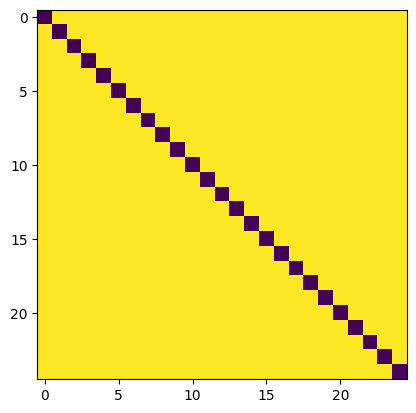

0.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.real(H_fci))
plt.show()
print(np.sum(np.abs(H_fci - np.transpose(H_fci))))

In [ ]:


eris = myci.ao2mo()
h1 = mf1.mo_coeff.T @ mf1.get_hcore() @ mf1.mo_coeff
H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=1225)[1]

# Calculate the FCI wavefunctions
e1, ci1 = cisolver1.kernel()
e2, ci2 = cisolver2.kernel()

# Calculate the overlap between the two FCI wavefunctions
norb = mf1.mo_coeff.shape[1]
nelec = mol.nelectron
overlap = addons.overlap(ci1, ci2, norb, nelec, s12)

print('<FCI1|FCI2> = ', overlap)

In [ ]:
mf1.mol.energy_nuc()

np.float64(4.32963172570909)

In [ ]:
from pyscf import gto, scf, fci
import pyscf

# Define the molecule
mol = gto.M(
    atom="""
    H 0.0 0.0 0.0
    H 0.0 0.0 0.74 
    """,
    basis='6-31g',
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol).run()
h_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=100000000)[1]


converged SCF energy = -1.12675531719693


/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


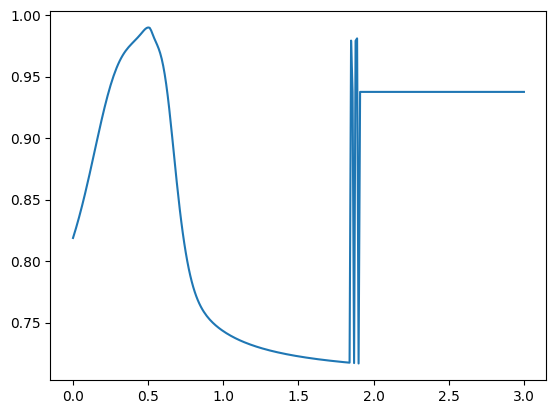

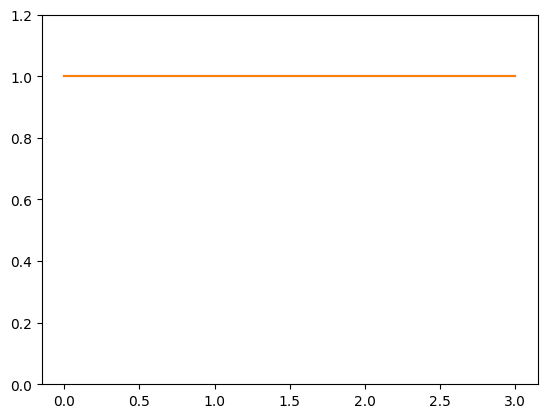

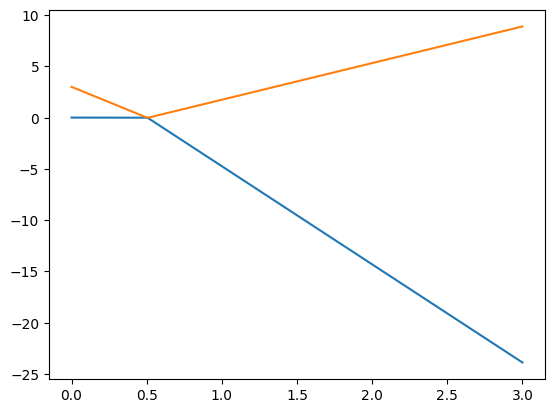

In [ ]:

q_data = data.data_dic['q_coord']
wf_adb = data.data_dic['wf_adb']
t = data.data_dic['t']
diag_eq = data.data_dic['diag_eq']
plt.plot(t, diag_eq)
plt.show()
plt.plot(t,np.abs(np.sum(wf_adb,axis=(1,2)))**2)
plt.plot(t,np.sum(np.abs(wf_adb)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
q_data=q_data.reshape((len(q_data), model.num_atoms, 3))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()

In [ ]:
import pyscf
print(pyscf.gto.getints(intor_name))

NameError: name 'intor_name' is not defined

In [ ]:
import pyscf 
from pyscf import gto, scf, ci, grad, nac
import numpy as np
from functools import reduce
# Define the molecule
mol = gto.M(
    atom="""
    H 0.0 0.0 0.0
    H 0.0 0.0 0.74 
    """,
    basis='6-31g',
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol).run()



# Calculate the CI wavefunction for the first two excited states
myci = ci.CISD(mf)
print(myci)
myci.complex_coeff = True
print(myci.complex_coeff)
myci.nroots = 13
myci.run()
print(myci)
ci_coeffs = myci.ci
print(ci_coeffs)

print('grads',myci.Gradients().grad_elec(civec=ci_coeffs[0]))



eris = myci.ao2mo()
#print(eris)

#print(np.dot(ci_coeffs, myci.contract(ci_coeffs, eris)))

#h_1 = mf.get_hcore()
#print(h_1)
#yci.contract(ci_coeffs, eris=eris)


#print(grad.cisd.grad_elec(myci))

#dc = grad.ucisd.Gradients(myci)
#grad1 = dc.kernel(civec=ci_coeffs+0.0j)

#
# RCISD wavefunction overlap
#
myhf1 = gto.M(atom='H 0 0 0; F 0 0 1.1', basis='6-31g', verbose=0).apply(scf.RHF).run()
ci1 = ci.CISD(myhf1)
ci1.nroots=2
ci1.run()
print('CISD energy of mol1', ci1.e_tot)

myhf2 = gto.M(atom='H 0 0 0; F 0 0 1.2', basis='6-31g', verbose=0).apply(scf.RHF).run()
ci2 = ci.CISD(myhf2).run()
print('CISD energy of mol2', ci2.e_tot)

s12 = gto.intor_cross('cint1e_ovlp_sph', myhf1.mol, myhf2.mol)
s12 = reduce(np.dot, (myhf1.mo_coeff.T, s12, myhf2.mo_coeff))
nmo = myhf2.mo_energy.size
nocc = myhf2.mol.nelectron // 2
print('<CISD-mol1|CISD-mol2> = ', ci.cisd.overlap(ci1.ci[0], ci2.ci, nmo, nocc, s12))

converged SCF energy = -1.12675531719693
True

WARN: Not enough eigenvectors (len(x0)=10, nroots=13)

RCISD root 0  E = -1.151672544961239
RCISD root 1  E = -0.5890774809143035
RCISD root 2  E = -0.1043664754503664
RCISD root 3  E = -0.04062368892334822
RCISD root 4  E = 0.2664408399568212
RCISD root 5  E = 0.6080613584099772
RCISD root 6  E = 0.8182612391101327
RCISD root 7  E = 0.9544509407888406
RCISD root 8  E = 1.4676406950214
RCISD root 9  E = 1.927698295882424
[array([ 9.92767006e-01, -7.67500665e-17,  5.67470373e-03, -1.36311884e-16,
       -7.64960862e-02, -1.56241898e-17,  4.53286032e-02,  1.63612287e-17,
       -5.05447656e-02,  2.60360975e-18,  4.53286032e-02,  3.18765342e-17,
       -4.28191387e-02]), array([ 6.25281653e-17,  6.99681203e-01,  3.72907663e-16,  2.02188638e-02,
        2.09629178e-16,  9.66961607e-02, -4.10674449e-16,  9.66961607e-02,
        1.31423428e-16,  2.62157168e-02, -4.10674449e-16,  2.62157168e-02,
       -4.54006357e-16]), array([-3.87535329e-03, -

[[-2.49164254e-02  3.41782256e-17 -4.02445974e-03  4.30246906e-04
  -8.53735009e-17  1.12980696e-16 -7.32808710e-04 -9.44635628e-04
  -6.13375778e-17  9.68409242e-04]
 [ 1.38580895e-19  2.74235812e-01  1.06071885e-17  2.24432687e-17
  -6.64735932e-02 -7.88536777e-02  4.10738232e-17  6.34517586e-16
  -6.22327107e-02  7.44789550e-16]
 [ 9.80824281e-05 -4.90794245e-17  5.30448217e-01  5.25923839e-02
   1.32981062e-16 -3.57366942e-16 -8.95768371e-02 -1.15470068e-01
   7.40685443e-16  1.18376100e-01]
 [-9.87040602e-06 -5.24022584e-17  4.95058472e-02  1.08083906e+00
   1.65492627e-16 -1.02959726e-16  9.01445620e-03  1.16201901e-02
   1.95080301e-16 -1.19126350e-02]
 [ 2.56463958e-19 -2.56542322e-02  1.96294126e-16  3.23506191e-16
   1.09905692e+00  4.11496895e-01 -4.14665687e-16 -1.31798558e-15
  -1.28385763e-01 -1.08486386e-16]
 [-2.25367595e-18 -2.44393978e-02 -1.84164546e-17  1.06017604e-16
   3.30464827e-01  1.23697497e+00  1.18237699e-15  1.31093014e-15
   1.37374031e-01  8.83876575e-17

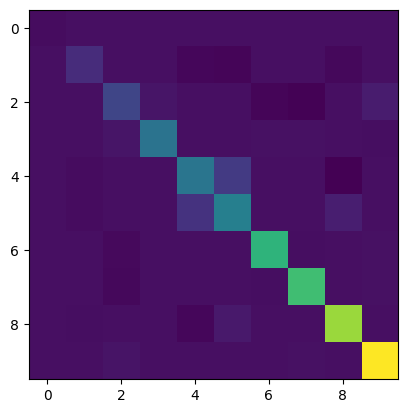

1.0945456740189359


In [ ]:
import matplotlib.pyplot as plt

def generate_CISD_H(myci, civec):
    out_mat = np.zeros((len(civec), len(civec)))
    for n in range(len(civec)):
        #out_mat[:,n] = myci.contract(civec[n], eris=eris)
        for m in range(len(civec)):
            mel = np.dot(civec[m],myci.contract(civec[n], eris=eris))
            out_mat[m, n] = mel

    return out_mat 

H = generate_CISD_H(myci, ci_coeffs)

print(H)
plt.imshow(np.real(H))
plt.show()
print(np.sum(np.abs(H - np.conjugate(np.transpose(H)))))

In [ ]:
print(np.shape(ci_coeffs))
print(np.shape(mf._eri))

(3, 13)
(55,)


In [ ]:
print(np.sort(np.linalg.eigvals(H)))

[-2.49172278e-02+0.00000000e+00j -3.26819728e-17-3.67381386e-17j
 -3.26819728e-17+3.67381386e-17j  6.73498801e-17+1.84889275e-32j
  5.37677836e-01+0.00000000e+00j  1.02238884e+00+0.00000000e+00j
  1.08613163e+00+0.00000000e+00j  1.39319616e+00+0.00000000e+00j
  1.73481668e+00+0.00000000e+00j  1.94501656e+00+0.00000000e+00j
  2.08120626e+00+0.00000000e+00j  2.59439601e+00+0.00000000e+00j
  3.05445361e+00+0.00000000e+00j]
